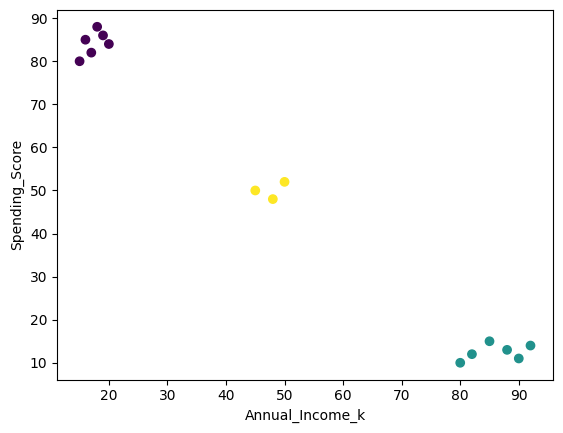

In [22]:
# ## Question 1: Clusters 🛒
# Imagine you are a marketing analyst. You have data on customers: their Annual Income and their Spending Score (1-100). You want to group them to target ads effectively.

# Crucial Note: K-Means calculates distance. If one variable is huge (Income: 50,000) and one is small (Score: 50), the huge one dominates. You MUST scale your data first!

# Dataset:

# data1 = {
#     'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#     'Annual_Income_k': [15, 16, 17, 18, 19, 20, 80, 82, 85, 88, 90, 92, 45, 48, 50],
#     'Spending_Score':  [80, 85, 82, 88, 86, 84, 10, 12, 15, 13, 11, 14, 50, 48, 52]
# }
# df1 = pd.DataFrame(data1)
# Your Tasks:

# Prepare Data: Select Annual_Income_k and Spending_Score as your features X. (Ignore CustomerID).

# Scale: Import StandardScaler, fit it on X, and transform X into X_scaled.

# Cluster:

# Import KMeans from sklearn.cluster.

# Create a model: kmeans = KMeans(n_clusters=3, random_state=42).

# Fit it to X_scaled.

# Predict: Use kmeans.fit_predict(X_scaled) to get the cluster labels (0, 1, 2) for each customer. Add these labels as a new column Cluster to your original DataFrame.

# Visualize: Create a scatter plot:

# X-axis: Annual_Income_k

# Y-axis: Spending_Score

# Color (c): The Cluster column.

# Bonus: Can you visually describe the 3 groups you found? (e.g., "Rich but stingy", "Poor but spends a lot").


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data1 = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'Annual_Income_k': [15, 16, 17, 18, 19, 20, 80, 82, 85, 88, 90, 92, 45, 48, 50],
    'Spending_Score':  [80, 85, 82, 88, 86, 84, 10, 12, 15, 13, 11, 14, 50, 48, 52]
}
df = pd.DataFrame(data1)


X = df[['Annual_Income_k','Spending_Score']]

scaler = StandardScaler()
X_normally_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X_normally_scaled)

y_predict = model.fit_predict(X_normally_scaled)

plt.scatter(df['Annual_Income_k'],df['Spending_Score'], c = y_predict)
plt.xlabel("Annual_Income_k")
plt.ylabel("Spending_Score")
plt.show();


#i can see 3 groups of clusters (Also forced by n_clusters parameter). Visually it appears that about 6 people earn less than 30k but they have a very high spending score (these 6 are poor as per statistics but spend a lot), 3 have income between 45k to 55k and spend in the same range whereas the remaining 6 have a high income in 80k-95k range but spend very less.

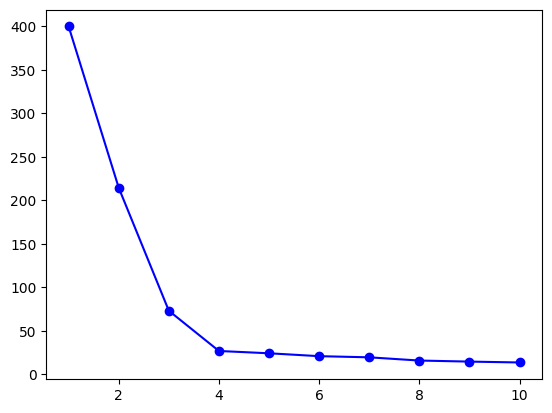

In [1]:
# # Question 2: The Elbow Method 💪The Elbow Method involves running K-Means multiple times (e.g., for k=1, k=2, k=3... up to k=10) and calculating the Inertia (sum of squared distances) for each.As we add more clusters, inertia always goes down.We look for the "Elbow" point where the drop slows down significantly. That's our optimal $k$.Dataset:This dataset is a bit messier. We don't know if there are 2, 3, 4, or 5 groups.Pythonimport pandas as pd

# # Generating a mystery dataset
# np.random.seed(42)
# data2 = {
#     'Feature_A': np.concatenate([
#         np.random.normal(0, 1, 50),   # Blob 1
#         np.random.normal(5, 1, 50),   # Blob 2
#         np.random.normal(10, 1, 50),  # Blob 3
#         np.random.normal(5, 1, 50)    # Blob 4 (overlaps with Blob 2 on X-axis)
#     ]),
#     'Feature_B': np.concatenate([
#         np.random.normal(0, 1, 50),
#         np.random.normal(0, 1, 50),
#         np.random.normal(0, 1, 50),
#         np.random.normal(8, 1, 50)    # Distinct in Y-axis
#     ])
# }
# df2 = pd.DataFrame(data2)


# Your Tasks:

# Scale: Create X and scale it using StandardScaler.

# The Loop:

# Create an empty list called inertias.

# Write a for loop that runs from k=1 to k=10.

# Inside the loop:

# Initialize KMeans with n_clusters=k and random_state=42.

# Fit it to the scaled data.

# Append model.inertia_ to your list.

# The Elbow Plot:

# Plot range(1, 11) on the X-axis.

# Plot inertias on the Y-axis.

# Mark the points with markers (e.g., marker='o').

# The Decision: Look at the graph. Where does the "Elbow" bend the most? Based on that, how many clusters should we use?


import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


np.random.seed(42)
data2 = {
    'Feature_A': np.concatenate([
        np.random.normal(0, 1, 50),   # Blob 1
        np.random.normal(5, 1, 50),   # Blob 2
        np.random.normal(10, 1, 50),  # Blob 3
        np.random.normal(5, 1, 50)    # Blob 4 (overlaps with Blob 2 on X-axis)
    ]),
    'Feature_B': np.concatenate([
        np.random.normal(0, 1, 50),
        np.random.normal(0, 1, 50),
        np.random.normal(0, 1, 50),
        np.random.normal(8, 1, 50)    # Distinct in Y-axis
    ])
}
df = pd.DataFrame(data2)

X = df[['Feature_A', 'Feature_B']]
scaler = StandardScaler()

x_normally_scaled = scaler.fit_transform(X)

inertias_ls = []

for k in range(1,11,1):
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(x_normally_scaled)
    inertias_ls.append(model.inertia_)

plt.plot(range(1,11,1), inertias_ls, c = 'b', marker = 'o')
plt.show();

#i can see that the plot shows the steepest angle of bend at n = 4 and second steepest is at n = 3. the optimal number of clusters should be 4 then.

In [11]:
# ## Question 3: The "Silhouette" Test 👤
# The Elbow Method is great, but it is visual and subjective. Sometimes the "elbow" is smooth and hard to spot. To be precise, data scientists use the Silhouette Score.

# What it measures:

# How close is a point to its own cluster neighbors? (Cohesion)

# How far is it from the next nearest cluster? (Separation)

# Range: -1 to +1.

# +1: Perfect cluster (dense and separated).

# 0: Overlapping clusters.

# -1: Wrong cluster.

# Your Tasks: We want to mathematically prove that k=4 is indeed better than k=3 or k=5.

# Use the same data (X and x_normally_scaled) from Question 2.

# Calculate Scores:

# Import silhouette_score from sklearn.metrics.

# Fit a KMeans model with k=3 and calculate the silhouette score.

# Fit a KMeans model with k=4 and calculate the silhouette score.

# Fit a KMeans model with k=5 and calculate the silhouette score.

# Hint: silhouette_score(X_scaled, labels) takes the data and the fit_predict labels as input.

# Compare: Print all three scores. Does k=4 have the highest score?

# This is the final verification step professionals use to defend their clustering choices!



import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler


np.random.seed(42)
data2 = {
    'Feature_A': np.concatenate([
        np.random.normal(0, 1, 50),   # Blob 1
        np.random.normal(5, 1, 50),   # Blob 2
        np.random.normal(10, 1, 50),  # Blob 3
        np.random.normal(5, 1, 50)    # Blob 4 (overlaps with Blob 2 on X-axis)
    ]),
    'Feature_B': np.concatenate([
        np.random.normal(0, 1, 50),
        np.random.normal(0, 1, 50),
        np.random.normal(0, 1, 50),
        np.random.normal(8, 1, 50)    # Distinct in Y-axis
    ])
}
df = pd.DataFrame(data2)

X = df[['Feature_A', 'Feature_B']]

scaler = StandardScaler()
x_normally_scaled = scaler.fit_transform(X)

model_k3 = KMeans(n_clusters = 3, random_state = 42)
model_k3.fit(x_normally_scaled)
y_predict_k3 = model_k3.predict(x_normally_scaled)
print('silhouette score for model where cluster number is 3: ', silhouette_score(x_normally_scaled, y_predict_k3))

model_k4 = KMeans(n_clusters = 4, random_state = 42)
model_k4.fit(x_normally_scaled)
y_predict_k4 = model_k4.predict(x_normally_scaled)
print('silhouette score for model where cluster number is 4: ', silhouette_score(x_normally_scaled, y_predict_k4))

model_k5 = KMeans(n_clusters = 5, random_state = 42)
model_k5.fit(x_normally_scaled)
y_predict_k5 = model_k5.predict(x_normally_scaled)
print('silhouette score for model where cluster number is 5: ', silhouette_score(x_normally_scaled, y_predict_k5))

# results
# silhouette score for model where cluster number is 3:  0.6025705653340561
# silhouette score for model where cluster number is 4:  0.6861658835897326
# silhouette score for model where cluster number is 5:  0.6088662147095697


#clearly the model with 4 clusters has the highest score thats why 4 is the best choice.

silhouette score for model where cluster number is 3:  0.6025705653340561
silhouette score for model where cluster number is 4:  0.6861658835897326
silhouette score for model where cluster number is 5:  0.6088662147095697


[0.72962445 0.22850762]


,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


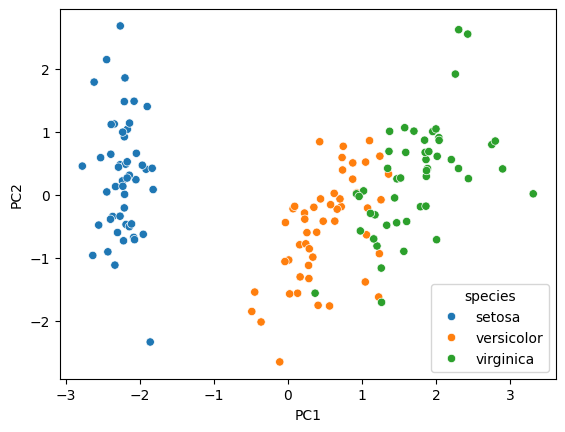

In [ ]:
# ## Question 4: Squashing the Iris 🌸
# We will use the famous Iris Dataset. It has 4 numeric measurements (Sepal Length, Sepal Width, Petal Length, Petal Width) for 3 types of flowers.

# The Goal: We cannot draw a 4D graph. Your job is to squash these 4 dimensions down to 2 Principal Components so we can plot them on a 2D piece of paper (screen).

# Dataset:
# We load the dataset directly from seaborn for convenience
# df = sns.load_dataset('iris')

# # Inspect the data
# print(df.head())
# Your Tasks:

# Prepare Data:

# Create X using the 4 numeric columns: 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'.

# Create y using the 'species' column (just for coloring the plot later).

# Scale (Crucial!): PCA is very sensitive to scale. Use StandardScaler to create X_scaled.

# Apply PCA:

# Import PCA from sklearn.decomposition.

# Create a model: pca = PCA(n_components=2) (Squash to 2 dimensions).

# Fit and Transform X_scaled into a new array called X_pca.

# Check Information Loss:

# Print pca.explained_variance_ratio_.

# This tells you how much of the original "story" is preserved in your new 2D version. (e.g., [0.72, 0.23] means Component 1 holds 72% of the info).

# Visualize:

# Create a DataFrame from X_pca with columns ['PC1', 'PC2'].

# Add the species column back to this new DataFrame.

# Use sns.scatterplot (or plt.scatter) to plot PC1 vs PC2, coloring by species.

# The Win Condition: If you see 3 clear clusters in your 2D plot, you have successfully compressed 4D reality into 2D!

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')


X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

scaler = StandardScaler()
X_normally_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_normally_scaled)

print(pca.explained_variance_ratio_)

df_2 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

df_final = pd.merge(df_2
                   ,df['species']
                   ,left_index  = True
                   ,right_index = True
                   ,how         = 'inner'
              )

display(df_final)

sns.scatterplot(df_final
               ,x = 'PC1'
               ,y = 'PC2'
               ,hue = 'species'
    )
plt.show();